In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
linear_data=pd.read_csv('delivery_time.csv')
linear_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Initial investigation

In [3]:
linear_data.shape

(21, 2)

In [4]:
linear_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
linear_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
linear_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Inference

1)The shape of the data set is (21,2)

2)There is no null value and data types are assigned correctly

3)There is no need to do data cleaning process

### Check Assumptions

Text(0, 0.5, 'Delivery time')

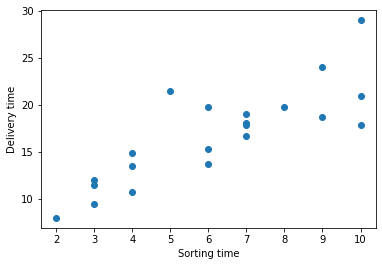

In [7]:
plt.scatter(x='Sorting Time',y='Delivery Time',data=linear_data)
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [8]:
linear_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

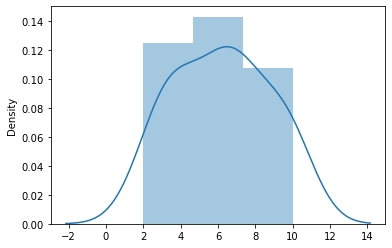

In [10]:
sns.distplot(x=linear_data['Sorting Time'])

<AxesSubplot:ylabel='Density'>

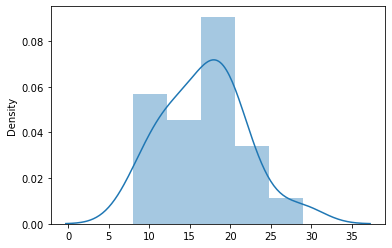

In [11]:
sns.distplot(x=linear_data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

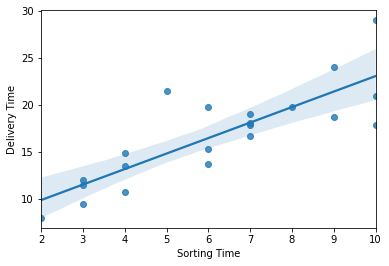

In [12]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=linear_data)

Inference

1)From the above plots its is clear that the input and output data are almost linear.

2)From the correlation table, it is clear that the strength of correlation is good.

3)since, there is only one input,multicollinearity doesn't occur.

Hence we can use built linear regression model

### Model Building

In [13]:
import statsmodels.formula.api as smf

In [14]:
xvar=linear_data[['Sorting Time']]
yvar=linear_data[['Delivery Time']]

In [15]:
model=smf.ols('yvar~xvar',data=linear_data).fit()

In [16]:
model.params

Intercept    6.582734
xvar         1.649020
dtype: float64

1)The value of slope is 1.649

2)The value of intercept is 6.5827

### Model evaluation 

In [17]:
y_pred=model.predict(xvar)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error is: ',mean_squared_error(yvar,y_pred))
print('R2 score is: ',r2_score(yvar,y_pred))

Mean square error is:  7.793311548584063
R2 score is:  0.6822714748417231


Inference

For a better model, the mean sqaure value should be close to zero, and R2 score should be close to 1